### import tree file from Ensembl 100, including branch distance

In [2]:
import ete3 # cannot run/install on osx-arm64 (e.g., M1 MacBook Pro) native environment 

ModuleNotFoundError: No module named 'ete3'

In [3]:
with open('../data/species_tree.branch_len.nw') as reader:
    nw=(reader.read())

In [4]:
tree = ete3.PhyloTree(nw)

In [6]:
import inflection

In [7]:
# Set how species names are handled (default is first three letters, here we have a human readable format)
def parse_sp_name(node_name):
    return node_name
tree.set_species_naming_function(parse_sp_name)

In [8]:
import numpy as np
import pandas as pd

In [9]:
dist_df=pd.DataFrame(columns=['NW_name','Human_distance','Mouse_distance','Chicken_distance'])

for species in tree.iter_species():
    name=inflection.humanize(species)
    h_distance=(tree&"homo_sapiens").get_distance((tree&species))
    m_distance=(tree&"mus_musculus").get_distance((tree&species))
    c_distance=(tree&"gallus_gallus").get_distance((tree&species))
    dist_df=dist_df.append({'NW_name':name,
                            'Human_distance':h_distance,
                            'Mouse_distance':m_distance,
                            'Chicken_distance':c_distance},
                            ignore_index=True)

dist_df.set_index('NW_name',inplace=True)

In [67]:
dist_df.groupby('Human_distance')

### Match species names in tree nodes to my species IDs and common names

In [18]:
# Bird and reptile species
# b_df = pd.read_excel('../data/species_nw.xlsx',sheet_name='Reptilia')
# b_df = pd.merge(b_df,dist_df,left_on='NW_name',right_index=True,how='left')

In [19]:
m_df = pd.read_excel('../data/species_nw.xlsx',sheet_name='Mammals')
m_df=pd.merge(m_df,dist_df,left_on='NW_name',right_index=True,how='left')

In [20]:
human_df=m_df[m_df.SpeciesCommonName!='Human']
human_stats_df=pd.read_excel('../results/celltype-specific_descriptive_stats.xlsx',sheet_name='human reference genome')
human_df=pd.merge(human_df,human_stats_df,left_on='SpeciesCommonName',right_on='SpeciesCommonName',how='inner')
human_df.sort_values(by=['Human_distance'],inplace=True)

In [21]:
human_df.Order.unique()

array(['Primates', 'Carnivora', 'Scandentia', 'Eulipotyphla', 'Rodentia',
       'Artiodactyla', 'Lagomorpha', 'Cingulata', 'Chiroptera', 'Pilosa',
       'Perissodactyla', 'Proboscidea', 'Hyracoidea', 'Afrosoricida',
       'Dasyuromorphia', 'Diprotodontia', 'Didelphimorphia'], dtype=object)

In [22]:
mouse_df=m_df[m_df.SpeciesCommonName!='Mouse']
mouse_stats_df=pd.read_excel('../results/celltype-specific_descriptive_stats.xlsx',sheet_name='mouse reference genome')
mouse_df=pd.merge(mouse_df,mouse_stats_df,left_on='SpeciesCommonName',right_on='SpeciesCommonName',how='inner')
mouse_df.sort_values(by=['Mouse_distance'],inplace=True)

In [23]:
mouse_df

,Ensembl98ID,SpeciesCommonName,NW_name,Order,Human_distance,Mouse_distance,Chicken_distance,Celltype,Median_dNdS,Confidence_Interval_Low,Confidence_Interval_High,Median_Absolute_Deviation
305,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,oligodendrocyte,0.219298,0.177083,0.258117,0.139356
304,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,microglia,0.282737,0.254902,0.307359,0.181079
303,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,astrocyte,0.226261,0.198113,0.263279,0.145762
301,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,endothelia,0.255738,0.231034,0.283422,0.162517
300,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,neuron,0.181556,0.160494,0.203187,0.130010
...,...,...,...,...,...,...,...,...,...,...,...,...
322,neugenii,Wallaby,Notamacropus eugenii,Diprotodontia,0.234055,0.247752,0.265628,microglia,0.085079,0.075835,0.091733,0.039730
321,neugenii,Wallaby,Notamacropus eugenii,Diprotodontia,0.234055,0.247752,0.265628,astrocyte,0.084569,0.071551,0.100876,0.043717
319,neugenii,Wallaby,Notamacropus eugenii,Diprotodontia,0.234055,0.247752,0.265628,endothelia,0.084513,0.073912,0.090878,0.043528
318,neugenii,Wallaby,Notamacropus eugenii,Diprotodontia,0.234055,0.247752,0.265628,neuron,0.062643,0.053949,0.071237,0.033499


In [24]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set_style('ticks')

In [25]:
# palette for mammals
palette={'Primates':'red', 'Carnivora':'silver', 'Scandentia':'blueviolet',
         'Eulipotyphla':'darkorange', 'Rodentia':'green','Artiodactyla':'orchid',
         'Lagomorpha':'lime', 'Cingulata':'gainsboro', 'Chiroptera':'steelblue', 
         'Pilosa':'gold','Perissodactyla':'blue', 'Proboscidea':'cornflowerblue',
         'Hyracoidea':'sandybrown', 'Afrosoricida':'purple','Dasyuromorphia':'cyan',
         'Diprotodontia':'olive', 'Didelphimorphia':'magenta'}

### Human Reference

<Figure size 720x540 with 0 Axes>

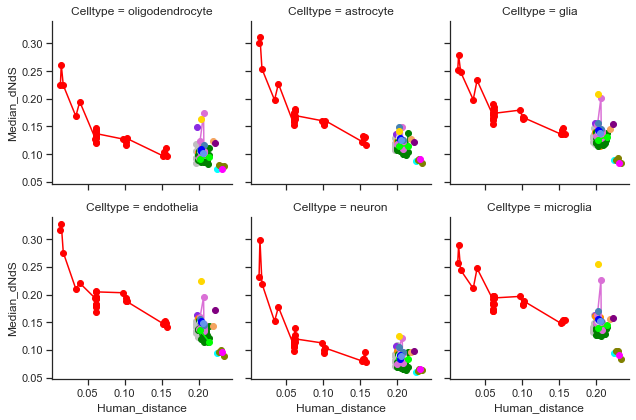

In [26]:
plt.figure(figsize=(10,7.5))
grid=sns.FacetGrid(human_df,col='Celltype',hue='Order',palette=palette,col_wrap=3)
grid.map(plt.plot, "Human_distance", "Median_dNdS",marker="o")
# grid.set(yscale='log')
# grid.fig.tight_layout(w_pad=1)

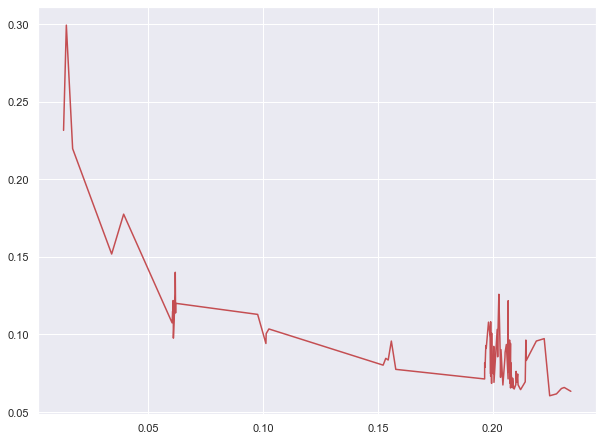

In [27]:
sns.set()
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)
data=human_df[human_df['Celltype']=='neuron']
ax = plt.plot(data["Human_distance"],data['Median_dNdS'],'r-')
plt.show()

In [28]:
import scipy.stats as stats

In [116]:
human_df.loc[:,['Celltype','Order','Median_dNdS']]

,Celltype,Order,Median_dNdS
443,oligodendrocyte,Primates,0.224018
441,astrocyte,Primates,0.301255
440,glia,Primates,0.252252
439,endothelia,Primates,0.316304
438,neuron,Primates,0.231426
...,...,...,...
322,microglia,Diprotodontia,0.084072
321,astrocyte,Diprotodontia,0.083389
323,oligodendrocyte,Diprotodontia,0.079596
318,neuron,Diprotodontia,0.063306


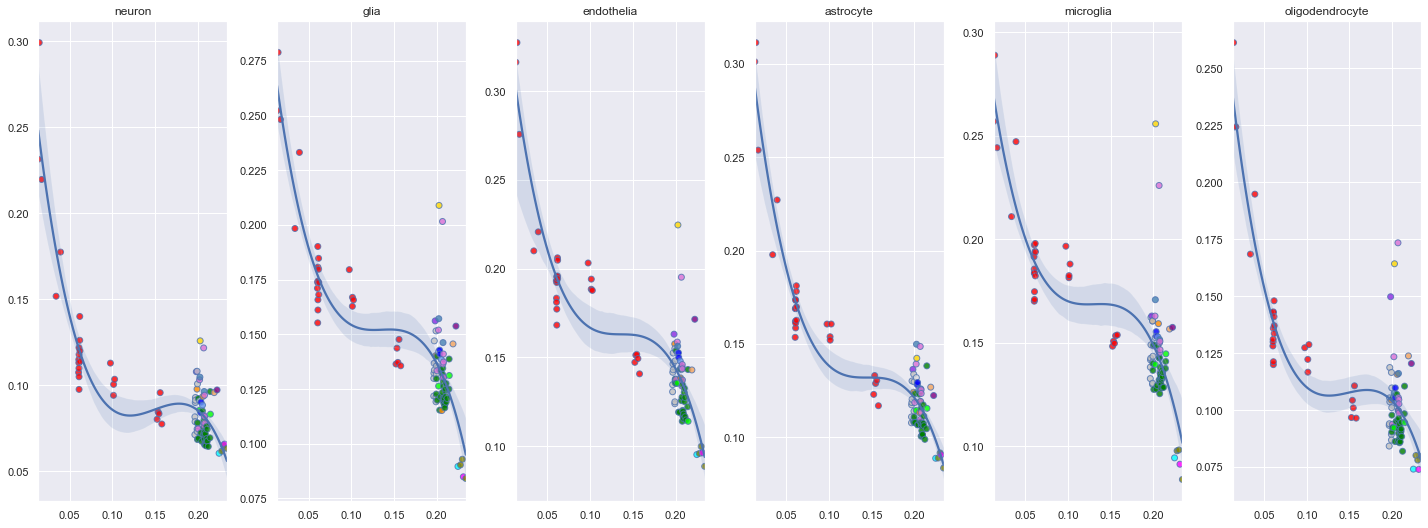

In [29]:
# grid = sns.FacetGrid(human_df,col='Celltype',col_wrap=3)

# grid.map(sns.jointplot,"Human_distance", "Median_dNdS",kind='reg')
# g = sns.lmplot(x='Human_distance',y='Median_dNdS',hue='Celltype',data=human_df,height=5)
# g.set(yscale='log')
# data=human_df.loc[:,['Celltype','Order','Median_dNdS','Human_distance']]
# sns.pairplot(data,diag_kind='auto')
palette={'Primates':'red', 'Carnivora':'silver', 'Scandentia':'blueviolet',
         'Eulipotyphla':'darkorange', 'Rodentia':'green','Artiodactyla':'orchid',
         'Lagomorpha':'lime', 'Cingulata':'gainsboro', 'Chiroptera':'steelblue', 
         'Pilosa':'gold','Perissodactyla':'blue', 'Proboscidea':'cornflowerblue',
         'Hyracoidea':'sandybrown', 'Afrosoricida':'purple','Dasyuromorphia':'cyan',
         'Diprotodontia':'olive', 'Didelphimorphia':'magenta'}
human_color_df=human_df.replace({'Order':palette})
fig,ax = plt.subplots(nrows=1,ncols=6, figsize=(20,7.5)) 
for i,celltype in enumerate(['neuron','glia','endothelia','astrocyte','microglia','oligodendrocyte']):
    plt.sca(ax[i]) 
    data=human_color_df[human_color_df['Celltype']==celltype]
#     data=data[data['Order']!='red']
    sns.regplot('Human_distance','Median_dNdS',data,scatter_kws={'facecolors':data['Order']},order=3)
    plt.title(celltype)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()

In [169]:
order_list=['Primates', 'Carnivora', 'Scandentia', 'Eulipotyphla', 'Rodentia',
       'Artiodactyla', 'Lagomorpha', 'Cingulata', 'Chiroptera', 'Pilosa',
       'Perissodactyla', 'Proboscidea', 'Hyracoidea', 'Afrosoricida',
       'Dasyuromorphia', 'Diprotodontia', 'Didelphimorphia']

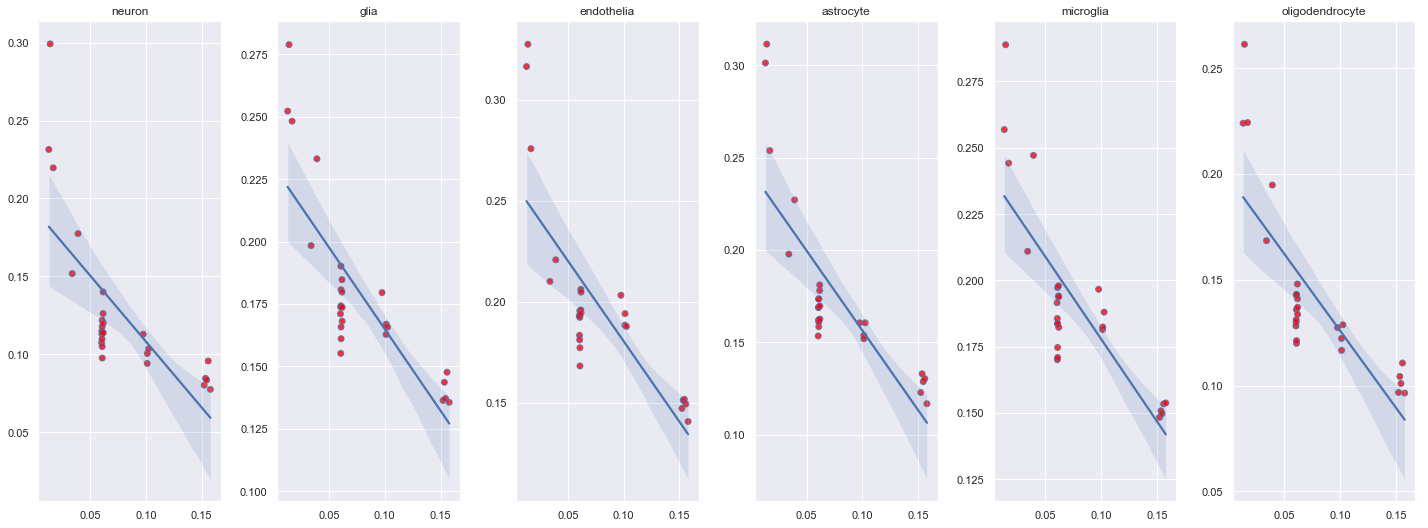

In [176]:
palette={'Primates':'red', 'Carnivora':'silver', 'Scandentia':'blueviolet',
         'Eulipotyphla':'darkorange', 'Rodentia':'green','Artiodactyla':'orchid',
         'Lagomorpha':'lime', 'Cingulata':'gainsboro', 'Chiroptera':'steelblue', 
         'Pilosa':'gold','Perissodactyla':'blue', 'Proboscidea':'cornflowerblue',
         'Hyracoidea':'sandybrown', 'Afrosoricida':'purple','Dasyuromorphia':'cyan',
         'Diprotodontia':'olive', 'Didelphimorphia':'magenta'}
human_color_df=human_df.replace({'Order':palette})
fig,ax = plt.subplots(nrows=1,ncols=6, figsize=(20,7.5)) 
for i,celltype in enumerate(['neuron','glia','endothelia','astrocyte','microglia','oligodendrocyte']):
    plt.sca(ax[i]) 
    data=human_color_df[human_color_df['Celltype']==celltype]
    data=data[data['Order']=='red']
    sns.regplot('Human_distance','Median_dNdS',data,scatter_kws={'facecolors':data['Order']},order=1)
    plt.title(celltype)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()

/Users/xulinhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


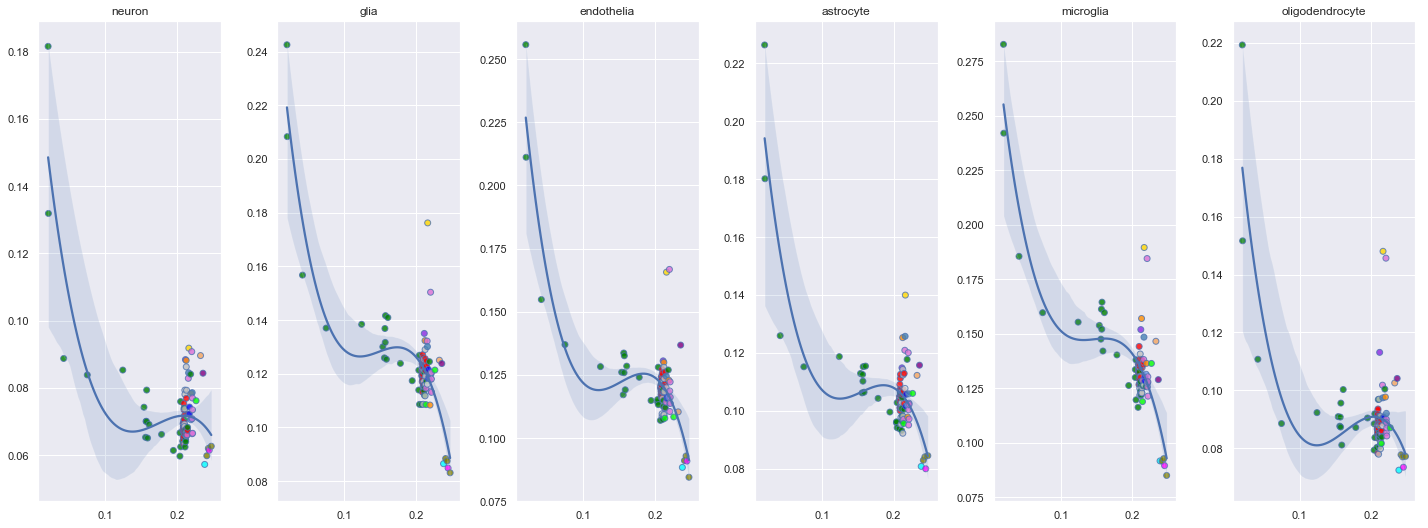

In [166]:
palette={'Primates':'red', 'Carnivora':'silver', 'Scandentia':'blueviolet',
         'Eulipotyphla':'darkorange', 'Rodentia':'green','Artiodactyla':'orchid',
         'Lagomorpha':'lime', 'Cingulata':'gainsboro', 'Chiroptera':'steelblue', 
         'Pilosa':'gold','Perissodactyla':'blue', 'Proboscidea':'cornflowerblue',
         'Hyracoidea':'sandybrown', 'Afrosoricida':'purple','Dasyuromorphia':'cyan',
         'Diprotodontia':'olive', 'Didelphimorphia':'magenta'}
mouse_color_df=mouse_df.replace({'Order':palette})
fig,ax = plt.subplots(nrows=1,ncols=6, figsize=(20,7.5)) 
for i,celltype in enumerate(['neuron','glia','endothelia','astrocyte','microglia','oligodendrocyte']):
    plt.sca(ax[i]) 
    data=mouse_color_df[human_color_df['Celltype']==celltype]
    sns.regplot('Mouse_distance','Median_dNdS',data,scatter_kws={'facecolors':data['Order']},order=3)
    plt.title(celltype)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()

<Figure size 720x540 with 0 Axes>

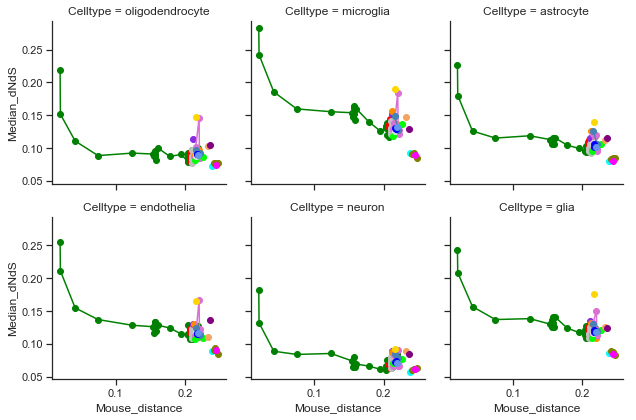

In [79]:
plt.figure(figsize=(10,7.5))
grid=sns.FacetGrid(mouse_df,col='Celltype',hue='Order',palette=palette,col_wrap=3)
grid.map(plt.plot, "Mouse_distance", "Median_dNdS",marker="o")
# grid.set(yscale='log')
# grid.fig.tight_layout(w_pad=1)

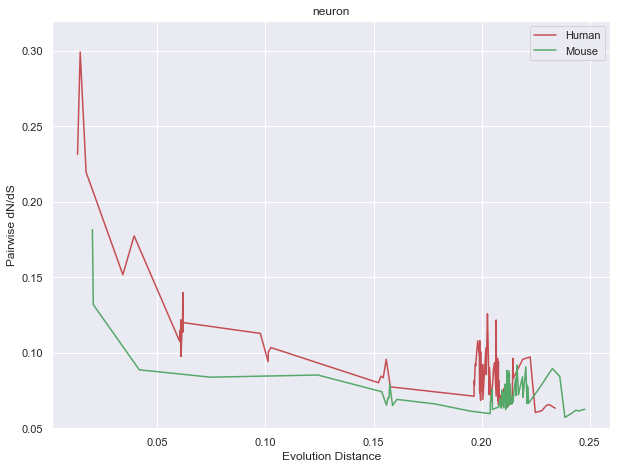

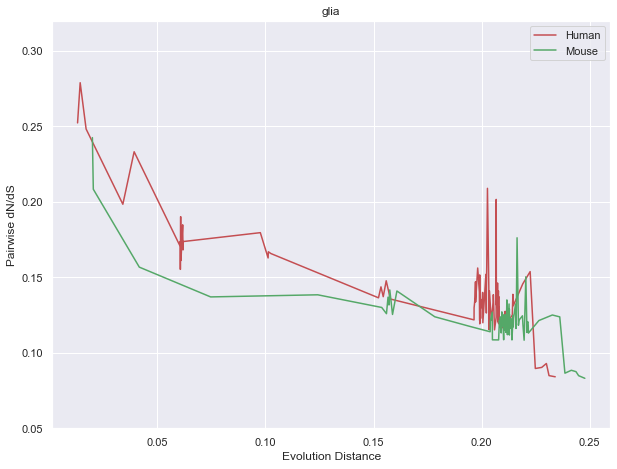

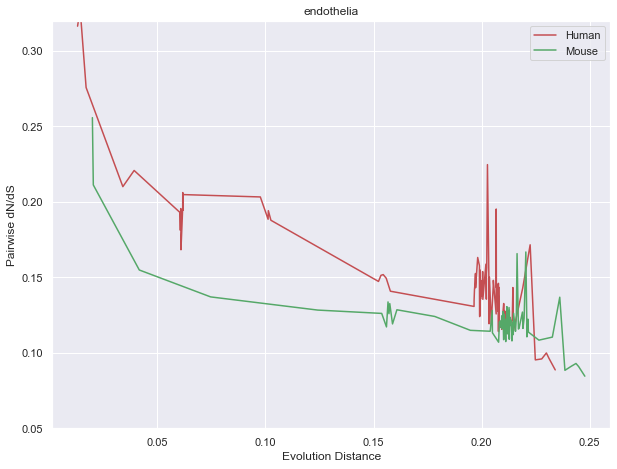

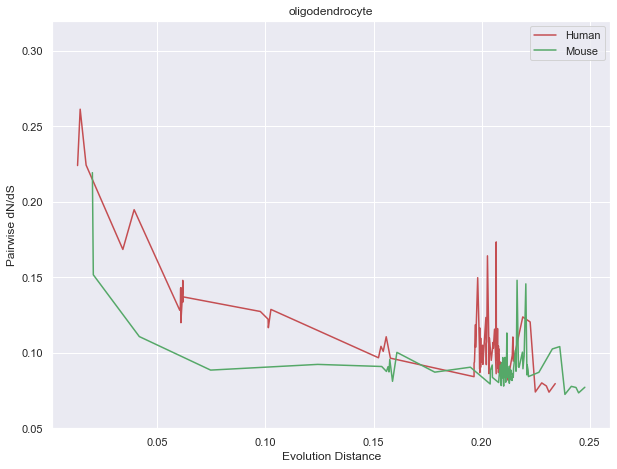

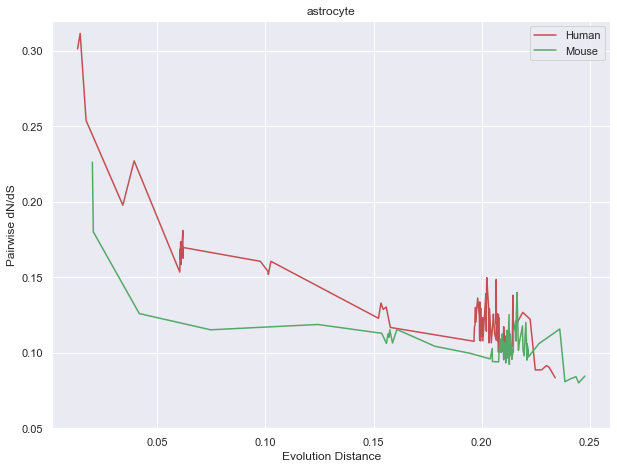

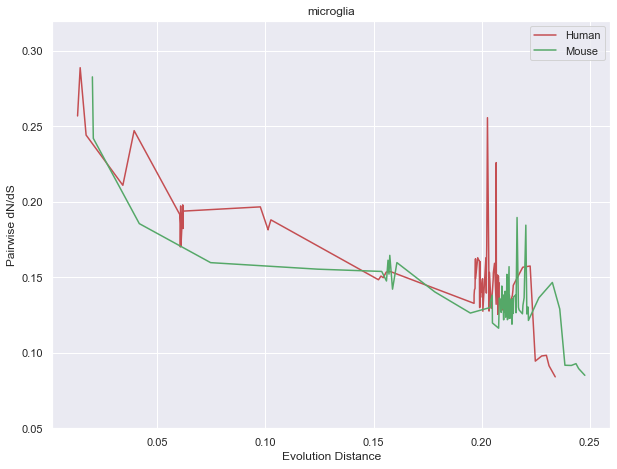

In [56]:
for celltype in ['neuron','glia','endothelia','oligodendrocyte','astrocyte','microglia']:
    sns.set()
    fig = plt.figure(figsize=(10,7.5))
    ax = fig.add_subplot(111)
    ax.set(ylim=(0.05, 0.32))
    ax.set(xlabel='Evolution Distance', ylabel='Pairwise dN/dS')
    h_data=human_df[human_df['Celltype']==celltype]
    ax = plt.plot(h_data["Human_distance"],h_data['Median_dNdS'],'r-',label='Human')
    m_data=mouse_df[mouse_df['Celltype']==celltype]
    ax = plt.plot(m_data["Mouse_distance"],m_data['Median_dNdS'],'g-',label='Mouse')
    plt.legend()
    plt.title(celltype)
    plt.show()

In [60]:
palette={'endothelia':'tab:blue','glia':'tab:green','neuron':'tab:red','oligodendrocyte':'lightblue','astrocyte':'lightgreen','microglia':'tab:orange'}
palette['endothelia']

'tab:blue'

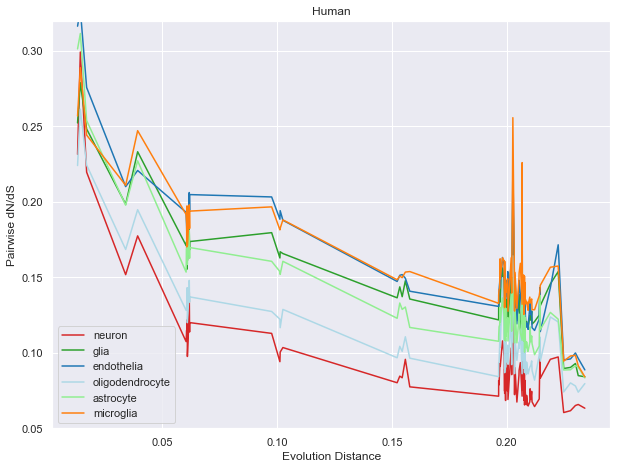

In [66]:
#Human
palette={'endothelia':'tab:blue','glia':'tab:green','neuron':'tab:red','oligodendrocyte':'lightblue','astrocyte':'lightgreen','microglia':'tab:orange'}
sns.set()
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)
ax.set(ylim=(0.05, 0.32))
ax.set(xlabel='Evolution Distance', ylabel='Pairwise dN/dS')
for celltype in ['neuron','glia','endothelia','oligodendrocyte','astrocyte','microglia']:
    data=human_df[human_df['Celltype']==celltype]
    ax = plt.plot(data["Human_distance"],data['Median_dNdS'],'-',label=celltype,color=palette[celltype])
plt.legend()
plt.title('Human')
plt.show()

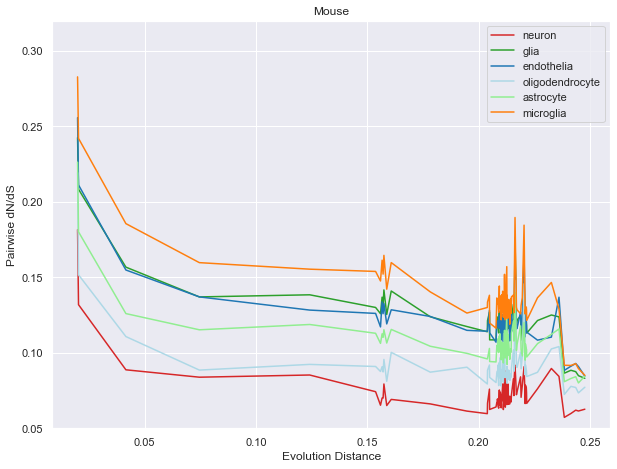

In [65]:
#Mouse
palette={'endothelia':'tab:blue','glia':'tab:green','neuron':'tab:red','oligodendrocyte':'lightblue','astrocyte':'lightgreen','microglia':'tab:orange'}
sns.set()
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)
ax.set(ylim=(0.05, 0.32))
ax.set(xlabel='Evolution Distance', ylabel='Pairwise dN/dS')
for celltype in ['neuron','glia','endothelia','oligodendrocyte','astrocyte','microglia']:
    data=mouse_df[mouse_df['Celltype']==celltype]
    ax = plt.plot(data["Mouse_distance"],data['Median_dNdS'],'-',label=celltype,color=palette[celltype])
plt.legend()
plt.title('Mouse')
plt.show()